> Trabajo: "Creacion del mapa topologico # 3"  
> Autor: Sergio Jacobo Zavaleta

In [2]:
from robots_moviles.topology_library import TopologicalMapProcessor, LinearTopologyOptimizer, GraphIO
import os
from pathlib import Path

#### Parametros

In [3]:
BASE_DIR = Path(os.getcwd())
MAP_DIR = BASE_DIR.parent / 'maps' / 'escenario_3.yaml'
RESULT_DIR = 'results/topologico/optimized'
MAP_NUMBER = '3'
GRAPH_DIR = f"{RESULT_DIR}/grafo_optimizado_{MAP_NUMBER}.json.gz"
GRAPH_IMAGE_DIR = f"{RESULT_DIR}/mapa_grafo_optimized_escenario_{MAP_NUMBER}.png"
REPORT_DETAILED_DIR = f"{RESULT_DIR}/grafo_optimizado_detallado_escenario_{MAP_NUMBER}.csv"
REPORT_SIMPLE_DIR = f"{RESULT_DIR}/grafo_optimizado_simple_escenario_{MAP_NUMBER}.csv"
REPORT_SUMMARY_DIR = f"{RESULT_DIR}/grafo_optimizado_resumen_escenario_{MAP_NUMBER}"

#### Crecion del mapa topologico

Primer píxel blanco (esquina casa) en píxeles: (184, 66)


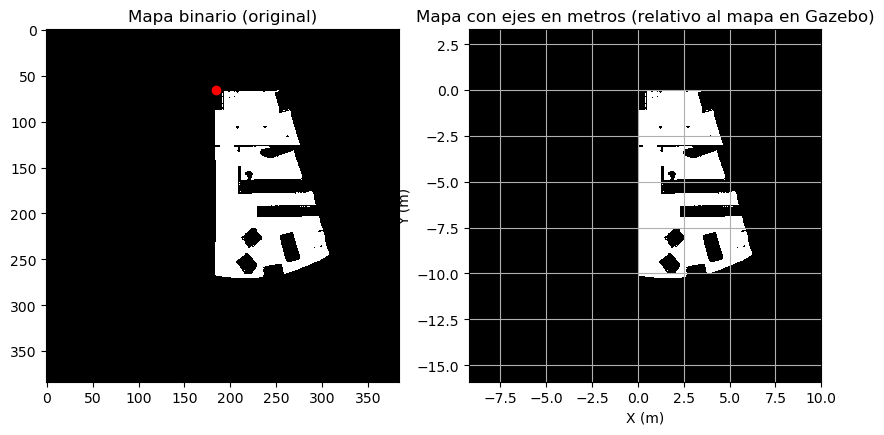

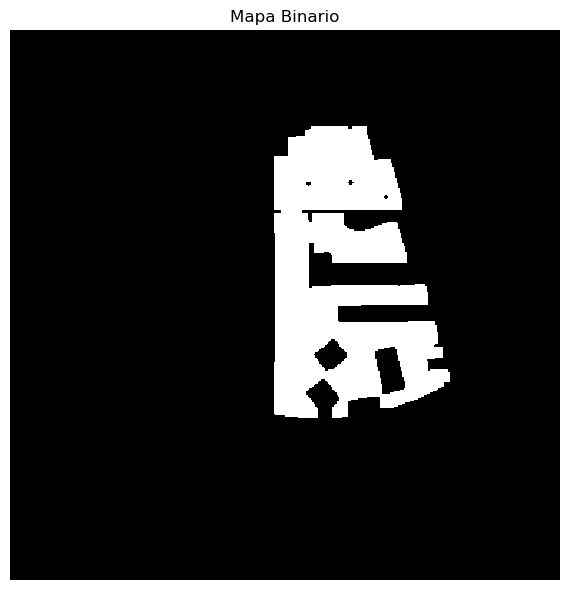

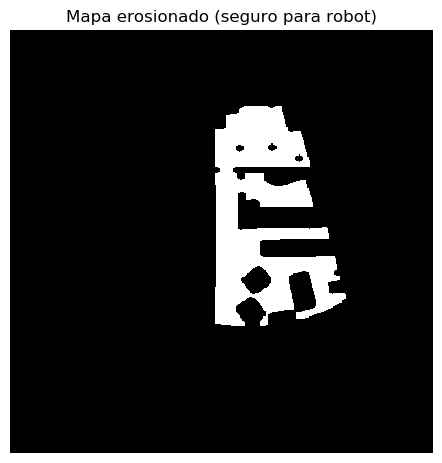

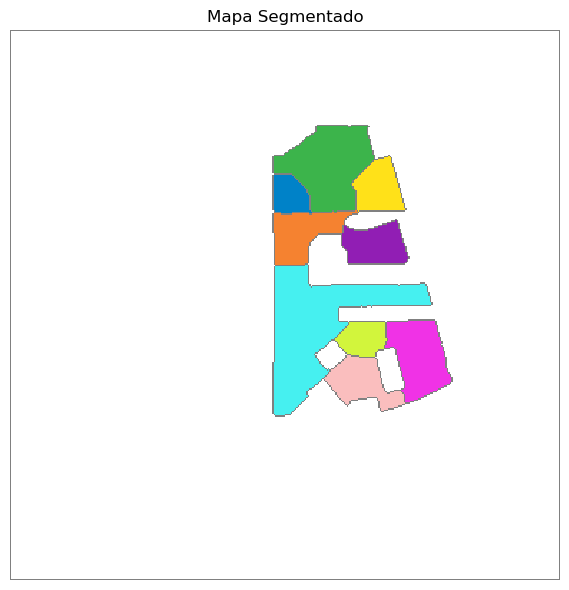

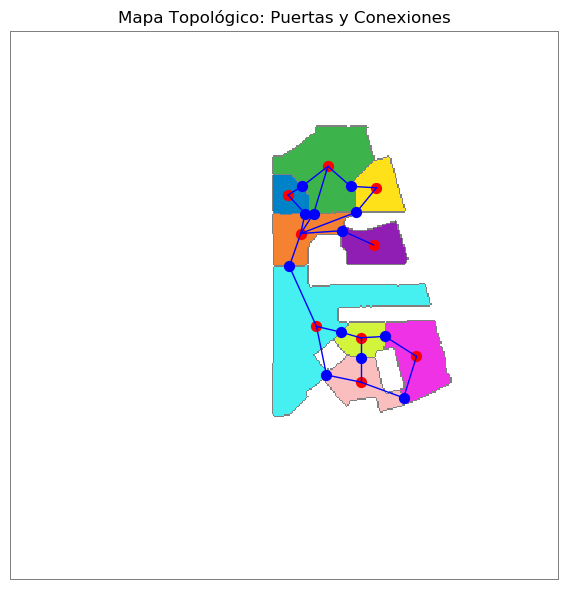

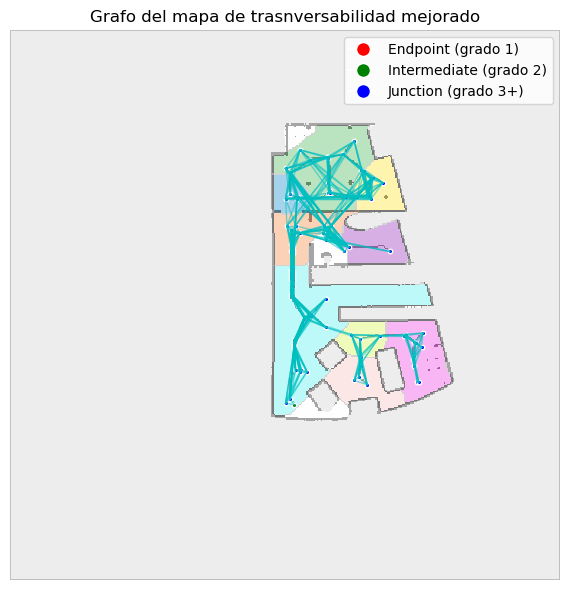

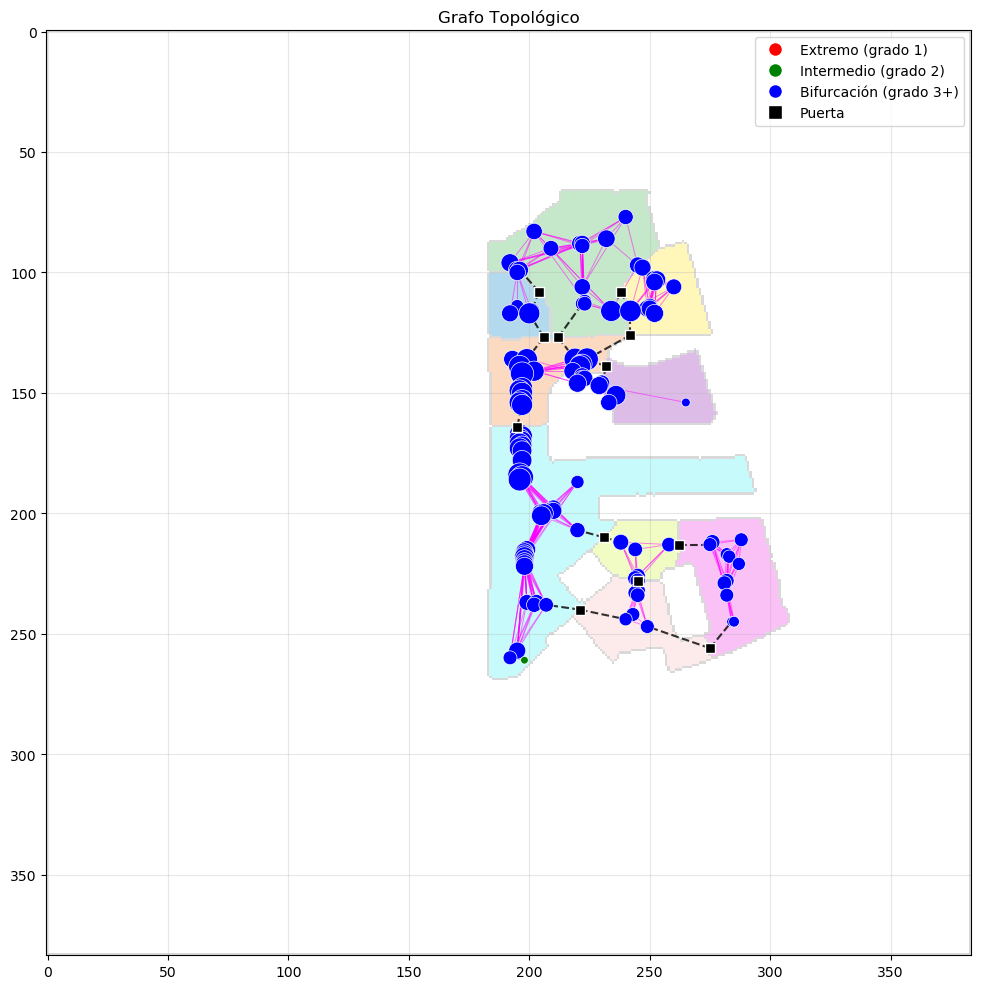

In [30]:
# Configuración de parámetros
config = TopologicalMapProcessor.Config()
# load_and_process_map
config.morph_open_kernel = (7, 7)  # Kernel más grande para menos ruido
config.erode_kernel = (3, 3)  # Erosión más fuerte
config.erode_iterations = 0  # Más erosión para menos ruido
# Erosión considerando el tamaño del robot
config.robot_diametro = 0.3         # Diámetro del robot en metros
config.dilate_robot_iterations = 1   # Iteraciones para dilatación del robot
# segment_map
config.watershed_threshold = 0.54  # Umbral más alto para menos segmentos
config.dilate_iterations = 6  # Menos dilatación para menos segmentos
# extract_voronoi_nodes
config.skeleton_erode_kernel = (13, 13)  # Esqueleto más grueso
# is curvature point
config.curvature_threshold = 0.6  # Umbral de curvatura más alto
# add_strategic_nodes
config.strategic_node_step = 15  # Paso más pequeño para nodos estratégicos
# are nodes connected by skeleton
config.max_gap = 18  # Mayor tolerancia a huecos si existe ruido en el esqueleto
# has direct connection skeleton
config.max_gap_door = 30  # Mayor tolerancia a huecos para puertas que nodos
# build_topological_graph
config.door_connection_threshold = 200  # Menor distancia para conectar puertas
# visualize_sleleton_graph
config.skeleton_node_size = 10  # Nodos más grandes
config.skeleton_line_width = 1  # Líneas más gruesas
config.skeleton_node_size = 10  # Nodos más grandes
# visualize_graph
config.graph_node_size_base = 10  # Tamaño base de nodos más grande
config.graph_node_size_factor = 10 # Factor de tamaño por grado
config.door_node_size = 50  # Tamaño de nodos puerta más grande

# Crear instancia topologica
processor = TopologicalMapProcessor(MAP_DIR,config=config)

# Procesamiento completo
processor.load_and_process_map(f"{RESULT_DIR}/mapa_binario_escenario_{MAP_NUMBER}.png")
processor.segment_map(f"{RESULT_DIR}/mapa_segmentado_escenario_{MAP_NUMBER}.png")
processor.extract_topological_info(f"{RESULT_DIR}/mapa_topologico_escenario_{MAP_NUMBER}.png")
processor.extract_voronoi_nodes(f"{RESULT_DIR}/mapa_transversabilidad_escenario_{MAP_NUMBER}.png")
processor.build_topological_graph()

# Resultados
processor.visualize_graph(f"{RESULT_DIR}/mapa_grafo_escenario_{MAP_NUMBER}.png")

Mostrar reportes

In [37]:
node_report = processor.generate_detailed_node_report(output_file=REPORT_DETAILED_DIR)
region_summary = processor.generate_region_summary(output_file=REPORT_SUMMARY_DIR)
# node_report = processor.generate_detailed_node_report()
# region_summary = processor.generate_region_summary()

Datos de regiones guardados en: results/topologico/optimized/grafo_optimizado_resumen_escenario_3_regions_20250510_204359.csv
Datos generales guardados en: results/topologico/optimized/grafo_optimizado_resumen_escenario_3_general_20250510_204359.csv

Estructura del grafo:
Regiones: 9
Puertas: 12
Nodos: 115
Conexiones internas: 549
Conexiones a puertas: 24


In [32]:
print("=== Reporte Detallado de Nodos ===")
print(node_report[node_report["region"] == 2])

=== Reporte Detallado de Nodos ===
   node_id      type    x    y   x_m   y_m region  degree  \
0    R2_N0  junction  240   77  2.80 -0.55      2      11   
1    R2_N1  junction  202   83  0.90 -0.85      2      13   
2    R2_N2  junction  232   86  2.40 -1.00      2      15   
3    R2_N3  junction  221   88  1.85 -1.10      2      13   
4    R2_N4  junction  222   88  1.90 -1.10      2      13   
5    R2_N5  junction  222   89  1.90 -1.15      2      11   
6    R2_N6  junction  209   90  1.25 -1.20      2      12   
7    R2_N7  junction  192   96  0.40 -1.50      2      16   
8    R2_N8  junction  245   97  3.05 -1.55      2      13   
9   R2_N10  junction  195   99  0.55 -1.65      2      15   
10  R2_N11  junction  196   99  0.60 -1.65      2      15   
11  R2_N16  junction  222  106  1.90 -2.00      2      13   
12  R2_N18  junction  223  112  1.95 -2.30      2       9   
13  R2_N19  junction  222  113  1.90 -2.35      2       9   
14  R2_N20  junction  223  113  1.95 -2.35      2 

In [33]:
print("\n=== Resumen por Región ===")
print(region_summary)


=== Resumen por Región ===
   region_id  num_nodes  avg_degree  num_endpoints  num_junctions  \
0          2         16   13.125000              0             16   
1          3         10   15.100000              0             10   
2          4          5   14.000000              0              5   
3          5         21   19.904762              0             21   
4          6          5   12.800000              0              5   
5          7         35   16.514286              0             34   
6          8         11    8.272727              0             11   
7          9          6   10.833333              0              6   
8         10          6    9.500000              0              6   

   num_intermediate    associated_doors    centroid  
0                 0          D0, D1, D3   (222, 94)  
1                 0              D0, D4  (256, 109)  
2                 0              D1, D2  (194, 114)  
3                 0  D2, D3, D4, D5, D6  (203, 141)  
4          

In [34]:
# Después de haber procesado el mapa y generado el esqueleto
simple_report = processor.generate_simple_skeleton_report(output_file=REPORT_SIMPLE_DIR)

# Acceder a los datos
print("=== Nodos del esqueleto ===")
print(simple_report["nodes"][simple_report["nodes"]["region"] == 2])

print("\n=== Conexiones del esqueleto ===")
print(simple_report["connections"][simple_report["connections"]["node1"] == 2])

=== Nodos del esqueleto ===
    node_id    x    y      type  degree  region
0         0  240   77  junction      11       2
1         1  202   83  junction      13       2
2         2  232   86  junction      15       2
3         3  221   88  junction      13       2
4         4  222   88  junction      13       2
5         5  222   89  junction      11       2
6         6  209   90  junction      12       2
7         7  192   96  junction      16       2
8         8  245   97  junction      13       2
10       10  195   99  junction      15       2
11       11  196   99  junction      15       2
16       16  222  106  junction      13       2
18       18  223  112  junction       9       2
19       19  222  113  junction       9       2
20       20  223  113  junction      10       2
26       26  234  116  junction      22       2

=== Conexiones del esqueleto ===
    node1  node2  distance  same_region
24      2      3  11.18 px         True
25      2      4  10.20 px         True
26

#### Grafo optimizado: Lineal

In [35]:
# Uso de la clase LinearTopologyOptimizer
original_graph = processor.graph

# Configuración
config = LinearTopologyOptimizer.Config()
config.keep_doors=True          # Siempre mantener nodos puerta
config.keep_endpoints=True      # Mantener nodos finales
config.min_node_degree=2        # Nodos con grado >= 2
config.connection_radius=30.0   # Radio de conexión ajustado
config.min_path_length=2        # Caminos de al menos 3 nodos
config.merge_aligned_nodes=True # Fusionar nodos alineados
config.alignment_tolerance=10.0 # Tolerancia de 10 grados
config.min_line_length=20.0     # Líneas de al menos 40px
config.max_merge_distance=10.0   # Fusionar nodos a <15px


# Optimización
linear_optimizer = LinearTopologyOptimizer(original_graph, config)
linear_graph = linear_optimizer.optimize()

# Verificación
print(f"Nodos: {len(linear_graph['nodes'])}")
print(f"Conexiones: {len(linear_graph['edges'])}")

Nodos: 40
Conexiones: 53


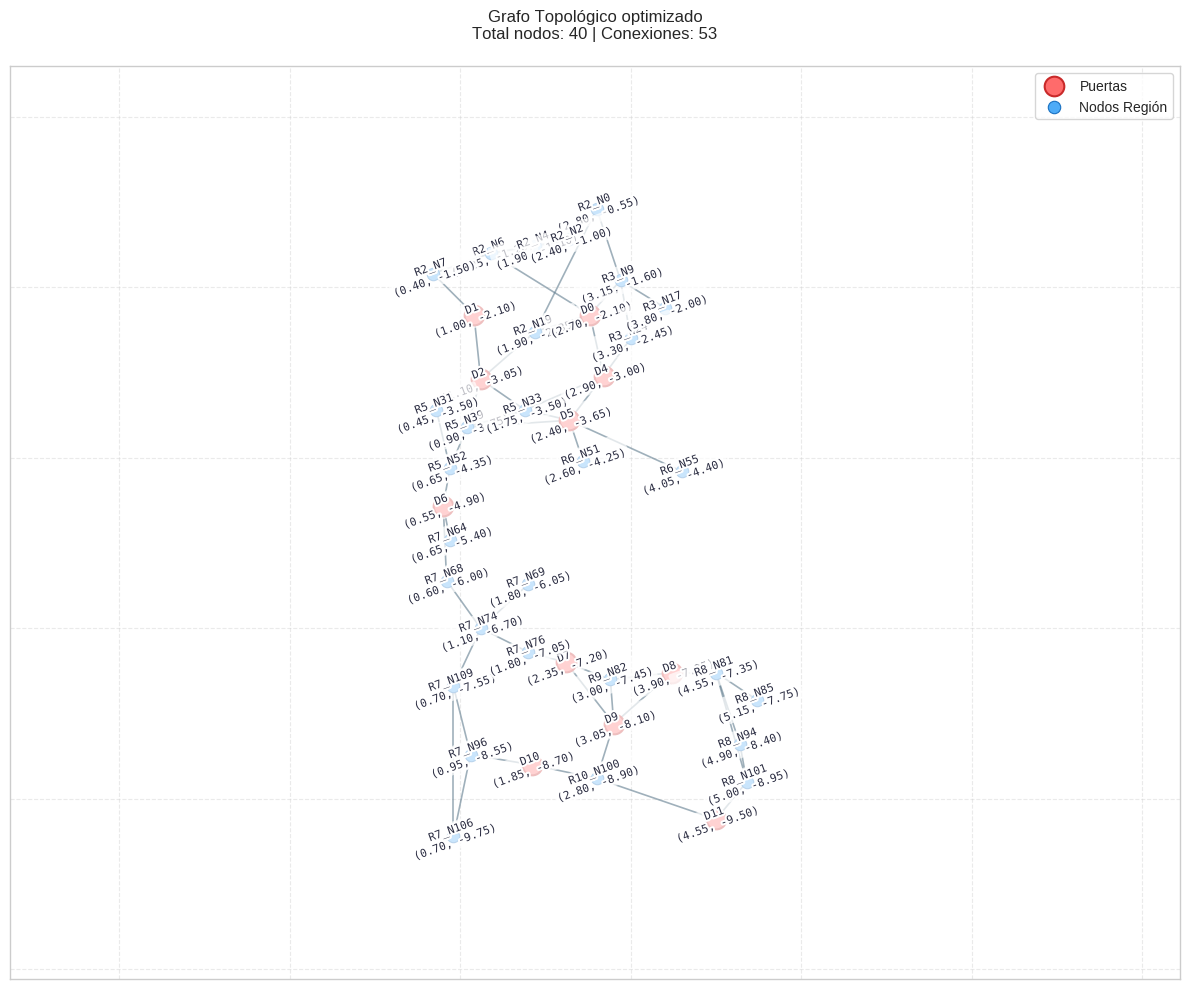

In [ ]:
# Crear instancia de GraphIO
graph_io = GraphIO()
graph_io.visualize_graph(linear_graph,path=GRAPH_IMAGE_DIR)

In [ ]:
# Guardar grafo optimizado
graph_io.save_graph(linear_graph, file_path=GRAPH_DIR)

# Opcional (para máxima compatibilidad con objetos Python)
# graph_io.save_graph_pickle(linear_graph, f"results/topologico/optimized/grafo_optimizado_{MAP_NUMBER}.pkl")